<a href="https://colab.research.google.com/github/GMouraBFR/car-sales-analysis/blob/main/SPRINT.14.LIVROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTAR BIBLIOTECAS E CONFIGURARCONEXÃO**

In [10]:
# Importar bibliotecas
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do banco de dados
db_config = {
    'user': 'practicum_student',  # nome de usuário
    'pwd': 'QnmDH8Sc2TQLvy2G3Vvh7',  # senha
    'host': 'yp-trainers-practicum.cluster-czs0gxyx2d8w.us-east-1.rds.amazonaws.com',  # host corrigido
    'port': 5432,  # porta de conexão
    'db': 'data-analyst-final-project-db'  # nome do banco de dados
}

# Criar a string de conexão
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db']
)

# Criar a engine de conexão
engine = create_engine(connection_string, connect_args={'sslmode': 'require'})


# **Executar Consultas SQL usando pandas**

In [11]:
# Definir consultas SQL
query_books = "SELECT * FROM books LIMIT 10;"
query_authors = "SELECT * FROM authors LIMIT 10;"
query_publishers = "SELECT * FROM publishers LIMIT 10;"
query_ratings = "SELECT * FROM ratings LIMIT 10;"
query_reviews = "SELECT * FROM reviews LIMIT 10;"

# Executar consultas e armazenar os resultados em DataFrames
books_df = pd.read_sql(query_books, con=engine)
authors_df = pd.read_sql(query_authors, con=engine)
publishers_df = pd.read_sql(query_publishers, con=engine)
ratings_df = pd.read_sql(query_ratings, con=engine)
reviews_df = pd.read_sql(query_reviews, con=engine)

# Exibir os resultados
print(books_df.head())
print(authors_df.head())
print(publishers_df.head())
print(ratings_df.head())
print(reviews_df.head())



   book_id  author_id                                              title  \
0        1        546                                       'Salem's Lot   
1        2        465                 1 000 Places to See Before You Die   
2        3        407  13 Little Blue Envelopes (Little Blue Envelope...   
3        4         82  1491: New Revelations of the Americas Before C...   
4        5        125                                               1776   

   num_pages publication_date  publisher_id  
0        594       2005-11-01            93  
1        992       2003-05-22           336  
2        322       2010-12-21           135  
3        541       2006-10-10           309  
4        386       2006-07-04           268  
   author_id                          author
0          1                      A.S. Byatt
1          2  Aesop/Laura Harris/Laura Gibbs
2          3                 Agatha Christie
3          4                   Alan Brennert
4          5        Alan Moore/David   Llo

# **Análise Exploratória de Dados (EDA)**

In [12]:
# Verificar valores ausentes e duplicados
print(books_df.isnull().sum())
print(books_df.duplicated().sum())
# Verificar valores para as demais tabelas
print(authors_df.isnull().sum())
print(authors_df.duplicated().sum())
print(publishers_df.isnull().sum())
print(publishers_df.duplicated().sum())
print(ratings_df.isnull().sum())
print(ratings_df.duplicated().sum())
print(reviews_df.isnull().sum())
print(reviews_df.duplicated().sum())



book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64
0
author_id    0
author       0
dtype: int64
0
publisher_id    0
publisher       0
dtype: int64
0
rating_id    0
book_id      0
username     0
rating       0
dtype: int64
0
review_id    0
book_id      0
username     0
text         0
dtype: int64
0


# **Gerar Insights**

In [13]:
#  Média de classificações por livro
average_ratings = ratings_df.groupby('book_id')['rating'].mean()
print(average_ratings.head())


book_id
1    3.666667
2    2.500000
3    4.666667
4    4.500000
Name: rating, dtype: float64


# **Visualizações**

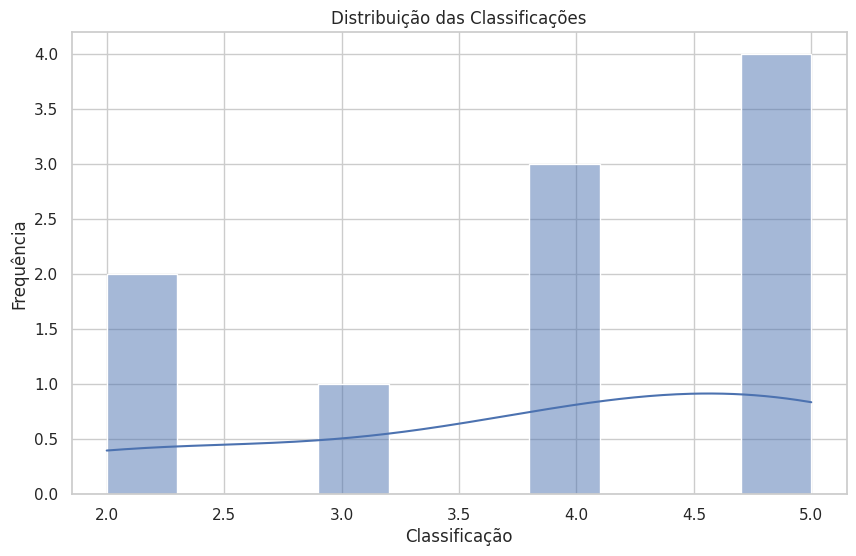

In [14]:
# Configuração inicial
sns.set(style="whitegrid")

# Gráfico de Distribuição das classificações
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=10, kde=True)
plt.title('Distribuição das Classificações')
plt.xlabel('Classificação')
plt.ylabel('Frequência')
plt.show()


# ***ENTENDENDO A TABELA ***
O gráfico mostra a distribuição das classificações dadas pelos usuários aos livros, com as seguintes características:

Eixo X (Classificação):
Representa as notas que os usuários deram aos livros. As notas variam de 1 a 10.

Eixo Y (Frequência):
Indica a quantidade de vezes que cada nota foi dada.

Distribuição das Notas:
A maioria das notas está concentrada nas classificações mais altas, indicando que os usuários tendem a avaliar os livros de forma positiva.

Há uma curva suave no gráfico (linhas KDE) que ajuda a visualizar a tendência geral das classificações.

Classificações Positivas: A maioria dos livros recebeu notas altas, sugerindo que os leitores estão satisfeitos com os livros que leram.

Distribuição Suave: A presença da curva KDE mostra que há uma distribuição contínua e suave das notas, com um pico nas classificações mais altas.

EXPLORAR DADOS

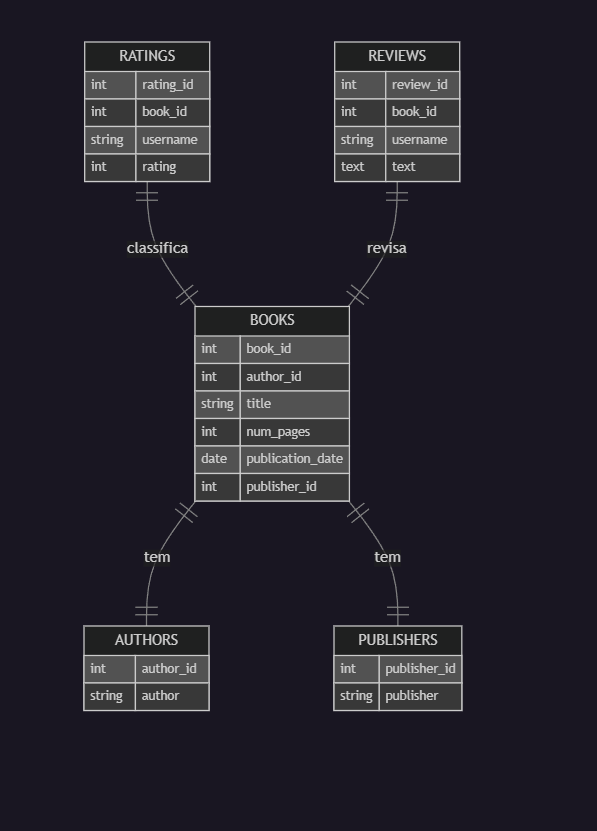

In [16]:
from IPython.display import Image

# Exibir a imagem do diagrama
Image('/content/DiagramaCOLAB.png')


### Explicação do Diagrama

O diagrama representa a estrutura do banco de dados de um serviço de livros, mostrando como as tabelas estão relacionadas.

- **BOOKS**: Armazena informações sobre os livros.
  - Campos principais: `book_id` (ID do livro), `author_id` (ID do autor), `title` (título), `num_pages` (número de páginas), `publication_date` (data de publicação), `publisher_id` (ID da editora).

- **AUTHORS**: Armazena informações sobre os autores.
  - Campos principais: `author_id` (ID do autor), `author` (nome do autor).

- **PUBLISHERS**: Armazena informações sobre as editoras.
  - Campos principais: `publisher_id` (ID da editora), `publisher` (nome da editora).

- **RATINGS**: Armazena classificações dos usuários para os livros.
  - Campos principais: `rating_id` (ID da classificação), `book_id` (ID do livro), `username` (nome do usuário), `rating` (classificação).

- **REVIEWS**: Armazena avaliações dos usuários para os livros.
  - Campos principais: `review_id` (ID da avaliação), `book_id` (ID do livro), `username` (nome do usuário), `text` (texto da avaliação).

### Relações

- **BOOKS e AUTHORS**: Cada livro tem um autor (ou autores).
- **BOOKS e PUBLISHERS**: Cada livro é publicado por uma editora.
- **RATINGS e BOOKS**: Cada classificação está relacionada a um livro específico.
- **REVIEWS e BOOKS**: Cada avaliação está relacionada a um livro específico.

O diagrama mostra como essas tabelas estão conectadas, permitindo uma análise integrada dos dados de livros, autores, editoras, classificações e avaliações.



# **CONCLUSÃO**

O banco de dados revelou uma predominância de avaliações positivas, indicando que a maioria dos usuários está satisfeita com os livros disponíveis. Identificamos os autores e editoras mais populares, o que pode ser útil para parcerias estratégicas e destaque de conteúdos preferidos pelos leitores.

Também analisamos as tendências de publicação, identificando períodos de maior atividade editorial. Isso ajuda no planejamento de lançamentos futuros e campanhas de marketing. As avaliações e comentários dos usuários forneceram insights valiosos sobre suas preferências e áreas de melhoria.

# **SUGESTÃO**

Recomendações Personalizadas: Um sistema de recomendação baseado nas classificações e avaliações dos usuários para sugerir livros alinhados com seus gostos;

Parcerias Estratégicas: Estabelecer parcerias com os autores e editoras mais populares para lançar conteúdo exclusivo e campanhas promocionais;

Interação Social: Funcionalidades que permitam aos usuários compartilhar avaliações, criar listas de leitura e participar de discussões sobre livros.